In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import cv2
from PIL import Image

from IPython.display import clear_output
from skimage.io import imread
from skimage.transform import resize
from skimage import io, transform, color, data_dir, draw, img_as_ubyte
from data_process import label_2_colour, resize_2_256, result_2_image

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# !ls drive/'My Drive'

In [5]:
array_path = '../data/carseg_data/good_arrays/'
arrays = glob.glob(array_path + '*.npy')
arrays = np.array([np.load(array) for array in arrays])
arrays.shape

(1233, 256, 256, 4)

In [73]:
def displayAugmentation(org_imgs, augmented_imgs, n=3):
    """Function displaying the original and augmented images side by side

    Args:
        org_imgs (numpy array): array with all the loaded arrays
        augmented_imgs (numpy array): array with all the augmented arrays
        n (int, optional): Number of cars to display. Defaults to 3, and becomes funcy if n > 3.
    """
    fig, ax = plt.subplots(n,4, figsize=(20,n*5))
    for i in range(n):
        org = org_imgs[i,:,:,0:3]
        org_mask = org_imgs[i,:,:,3]
        aug = augmented_imgs[i,:,:,0:3]
        aug_mask = augmented_imgs[i,:,:,3]
        ax[i,0].imshow(org)
        ax[i,0].set_title('original_image')
        ax[i,1].imshow(label_2_colour(org_mask))
        ax[i,1].set_title('original_label')
        ax[i,2].imshow(aug)
        ax[i,2].set_title('augmented_image')
        ax[i,3].imshow(label_2_colour(aug_mask))
        ax[i,3].set_title('augmented_label')

    plt.show()

# Augmentation

use the package imgaug

https://imgaug.readthedocs.io/en/latest/index.html

In [6]:
import imgaug.augmenters as iaa

In [7]:
images = arrays[:,:,:,0:3]
segmaps = arrays[:,:,:,-1,None]

# Flip

In [8]:
seq = iaa.Sequential([iaa.Fliplr(1)])   # Flips all images (1.0 = 100%)
images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)
flip_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)       # Concatenates the flipped images

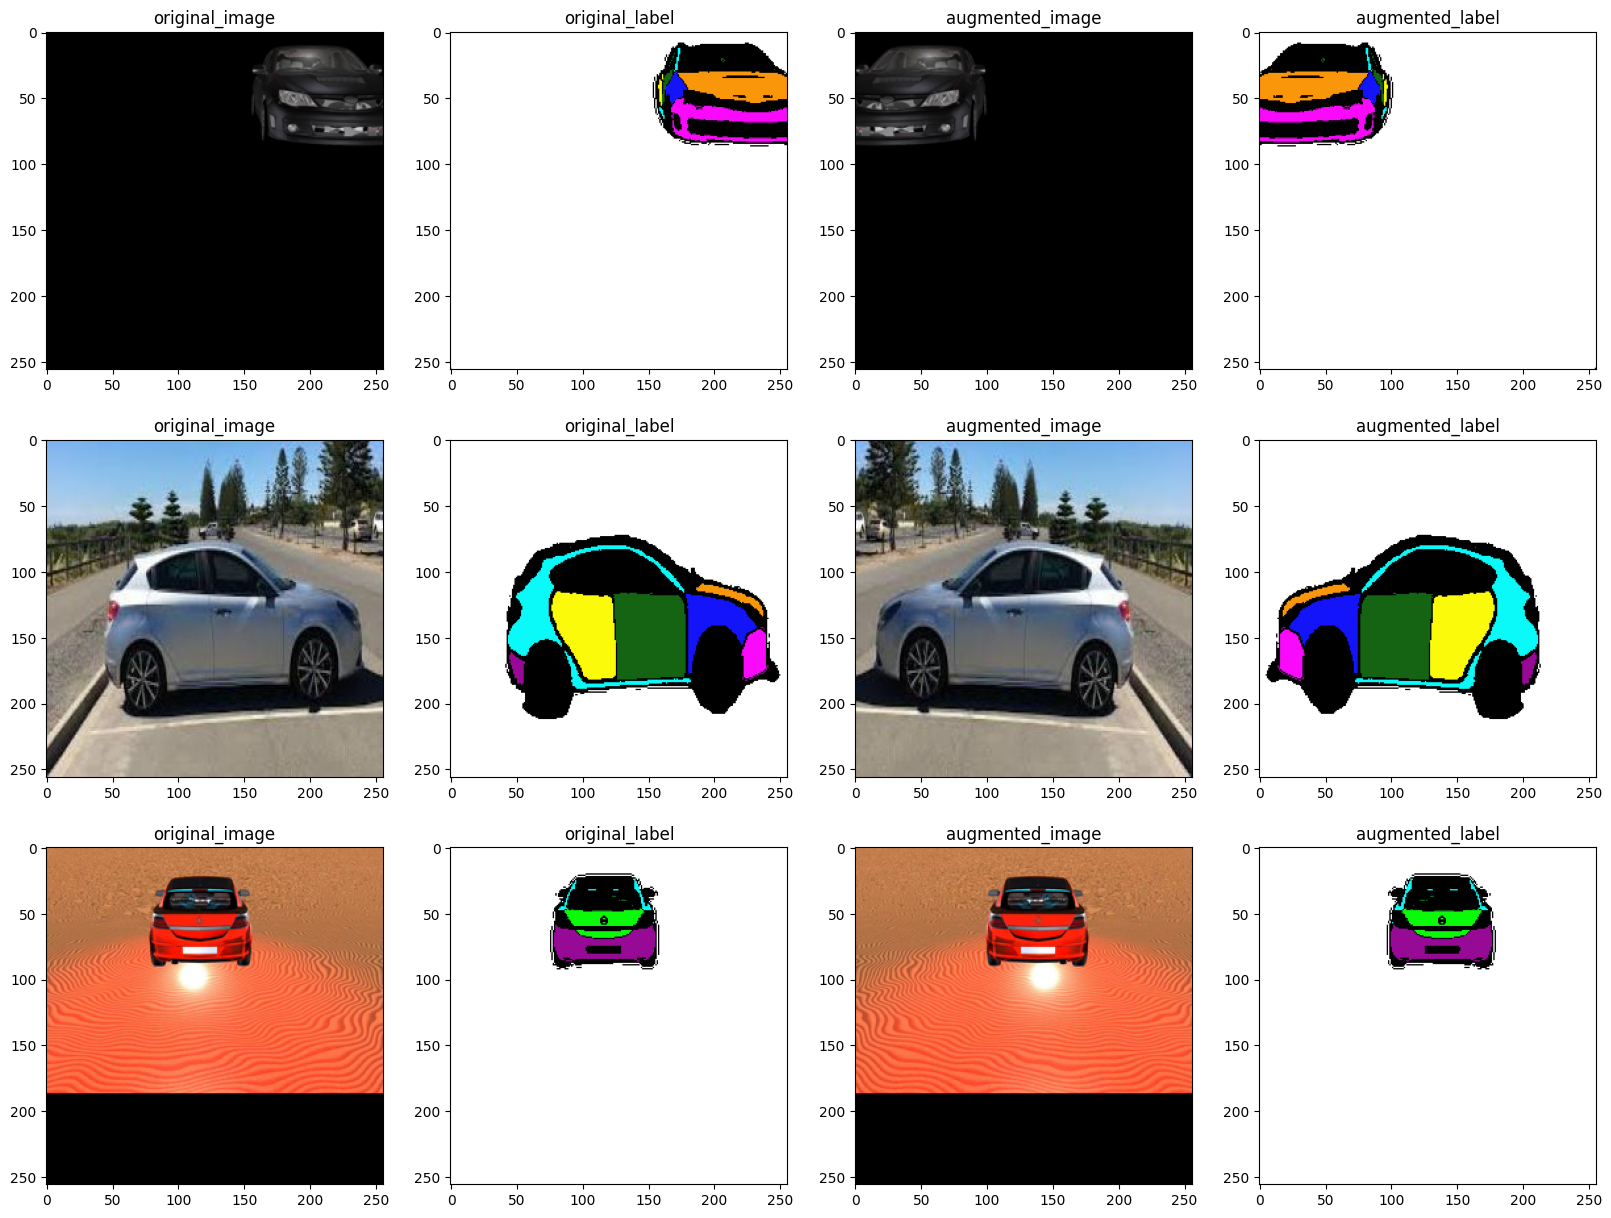

In [74]:
displayAugmentation(arrays, flip_arr, n=3)

# rotate

In [40]:
seq = iaa.Sequential([iaa.Affine(rotate=(-25, 25))])

images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)

In [41]:
rot_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)
# np.save("drive/My Drive/photo_rotate.npy", arr)

In [72]:
# displayAugmentation(arrays, rot_arr, n=3)

# Weather

## Fog

In [75]:
seq = iaa.Sequential([iaa.Fog()])
images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)
fog_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)

In [77]:
# displayAugmentation(arrays, fog_arr, n=3)

## Snow

In [46]:
seq = iaa.Sequential([iaa.Snowflakes()])
images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)
snow_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)

In [70]:
# displayAugmentation(arrays, snow_arr, n=3)

## Rain

In [48]:
seq = iaa.Sequential([iaa.Rain()])
images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)
rain_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)

In [69]:
# displayAugmentation(arrays, rain_arr, n=3)

## Sunny

In [61]:
seq = iaa.Sequential([iaa.MultiplyBrightness((1.2, 1.6))])
images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)
bright_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)

In [67]:
# displayAugmentation(arrays, bright_arr, n=3)

## Blur

In [65]:
seq = iaa.Sequential([iaa.GaussianBlur(sigma=(0.7, 1.5))])
images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)
blur_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)

In [68]:
# displayAugmentation(arrays, blur_arr, n=3)

# Save all the augmented images, as arrays and as images

In [84]:
img_dir = "../data/carseg_data/augmented_images/"
arr_dir = "../data/carseg_data/augmented_arrays/"

all_augmented = [flip_arr, rot_arr, fog_arr, snow_arr, rain_arr, bright_arr, blur_arr]
file_names = ['flip', 'rot', 'fog', 'snow', 'rain', 'bright', 'blur']

for array_list, name in zip(all_augmented, file_names):  # number of images
    i = 0
    for array in array_list:
        img = array[:,:,0:3]
        plt.imsave(os.path.join(img_dir, "{}_{}.png".format(name,i)), img, cmap='plasma') # The file name of first image would be 0.png
        np.save(os.path.join(arr_dir, "{}_{}.npy".format(name,i)), array)
        i+=1
